# Kidney Disease Classification using Machine Learning

This notebook implements multiple machine learning algorithms to classify kidney disease (CKD) based on various medical features.

## Dataset Overview
The dataset contains features such as:
- Creatinine
- BUN (Blood Urea Nitrogen)
- GFR (Glomerular Filtration Rate)
- Urine Output
- Diabetes
- Hypertension
- Age
- Protein in Urine
- Water Intake
- Medication

**Target Variable**: CKD_Status (0 = No Disease, 1 = Disease)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, auc, roc_auc_score)

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")


All libraries imported successfully!


## 1. Data Loading and Initial Exploration


In [ ]:
# Load the dataset
df = pd.read_csv('kidney_dataset.csv')

# Display basic information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"Shape of dataset: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


DATASET INFORMATION
Shape of dataset: (5000, 11)

Columns: ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Diabetes', 'Hypertension', 'Age', 'Protein_in_Urine', 'Water_Intake', 'Medication', 'CKD_Status']

First few rows:


,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [ ]:
# Check for missing values and data types
print("=" * 60)
print("DATA TYPES AND MISSING VALUES")
print("=" * 60)
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDataset statistics:")
df.describe()


DATA TYPES AND MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB
None

Missing values per column:
Creatinine             0
BUN                    0
GFR                    0
Urine_Output           0
Diabetes               0
Hypertension           0
Age  

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,CKD_Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.994088,30.780063,73.251883,1664.302800,0.294000,0.378200,50.048733,537.053851,2.504335,0.263000
std,2.027013,31.148341,31.972399,599.384655,0.455637,0.484986,14.492020,817.510451,0.868925,0.440306
min,0.600040,7.007732,5.000000,400.502554,0.000000,0.000000,18.000000,50.010471,1.000810,0.000000
25%,0.801333,11.367599,53.036801,1105.890821,0.000000,0.000000,40.190016,83.692533,1.744138,0.000000
50%,1.007629,15.878566,89.555882,1814.499690,0.000000,0.000000,49.942824,119.492591,2.511710,0.000000
75%,2.163997,40.636666,93.989273,2146.441778,1.000000,1.000000,59.761132,588.428649,3.268812,1.000000
max,7.996428,119.931652,105.451432,2499.939696,1.000000,1.000000,90.000000,2997.724192,3.998043,1.000000


In [ ]:
# Check target variable distribution
print("=" * 60)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 60)
print(df['CKD_Status'].value_counts())
print(f"\nPercentage distribution:")
print(df['CKD_Status'].value_counts(normalize=True) * 100)


TARGET VARIABLE DISTRIBUTION
CKD_Status
0    3685
1    1315
Name: count, dtype: int64

Percentage distribution:
CKD_Status
0    73.7
1    26.3
Name: proportion, dtype: float64


## 2. Data Visualization - Dataset Analysis


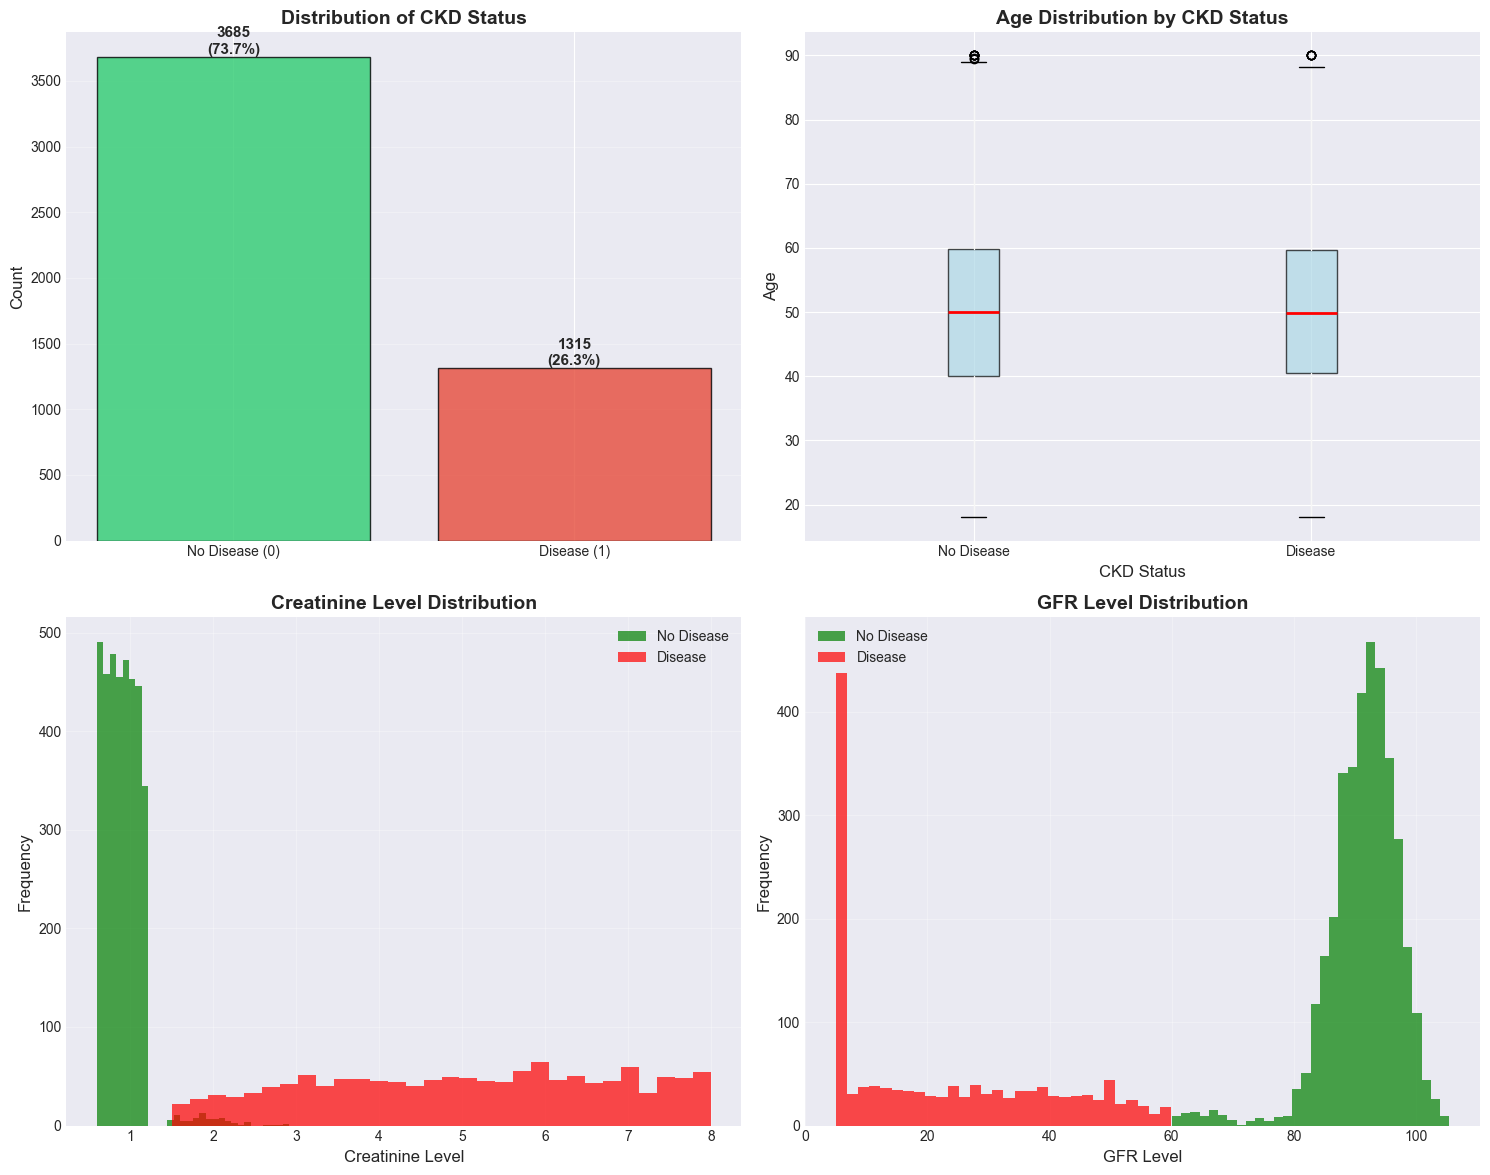

In [ ]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Target variable distribution
ax1 = axes[0, 0]
target_counts = df['CKD_Status'].value_counts()
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(['No Disease (0)', 'Disease (1)'], target_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Distribution of CKD Status', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Age distribution by CKD Status
ax2 = axes[0, 1]
df.boxplot(column='Age', by='CKD_Status', ax=ax2, patch_artist=True,
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
ax2.set_title('Age Distribution by CKD Status', fontsize=14, fontweight='bold')
ax2.set_xlabel('CKD Status', fontsize=12)
ax2.set_ylabel('Age', fontsize=12)
ax2.set_xticklabels(['No Disease', 'Disease'])
plt.suptitle('')  # Remove default title

# 3. Creatinine distribution
ax3 = axes[1, 0]
df[df['CKD_Status']==0]['Creatinine'].hist(alpha=0.7, label='No Disease', bins=30, color='green', ax=ax3)
df[df['CKD_Status']==1]['Creatinine'].hist(alpha=0.7, label='Disease', bins=30, color='red', ax=ax3)
ax3.set_title('Creatinine Level Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Creatinine Level', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.legend()
ax3.grid(alpha=0.3)

# 4. GFR distribution
ax4 = axes[1, 1]
df[df['CKD_Status']==0]['GFR'].hist(alpha=0.7, label='No Disease', bins=30, color='green', ax=ax4)
df[df['CKD_Status']==1]['GFR'].hist(alpha=0.7, label='Disease', bins=30, color='red', ax=ax4)
ax4.set_title('GFR Level Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('GFR Level', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


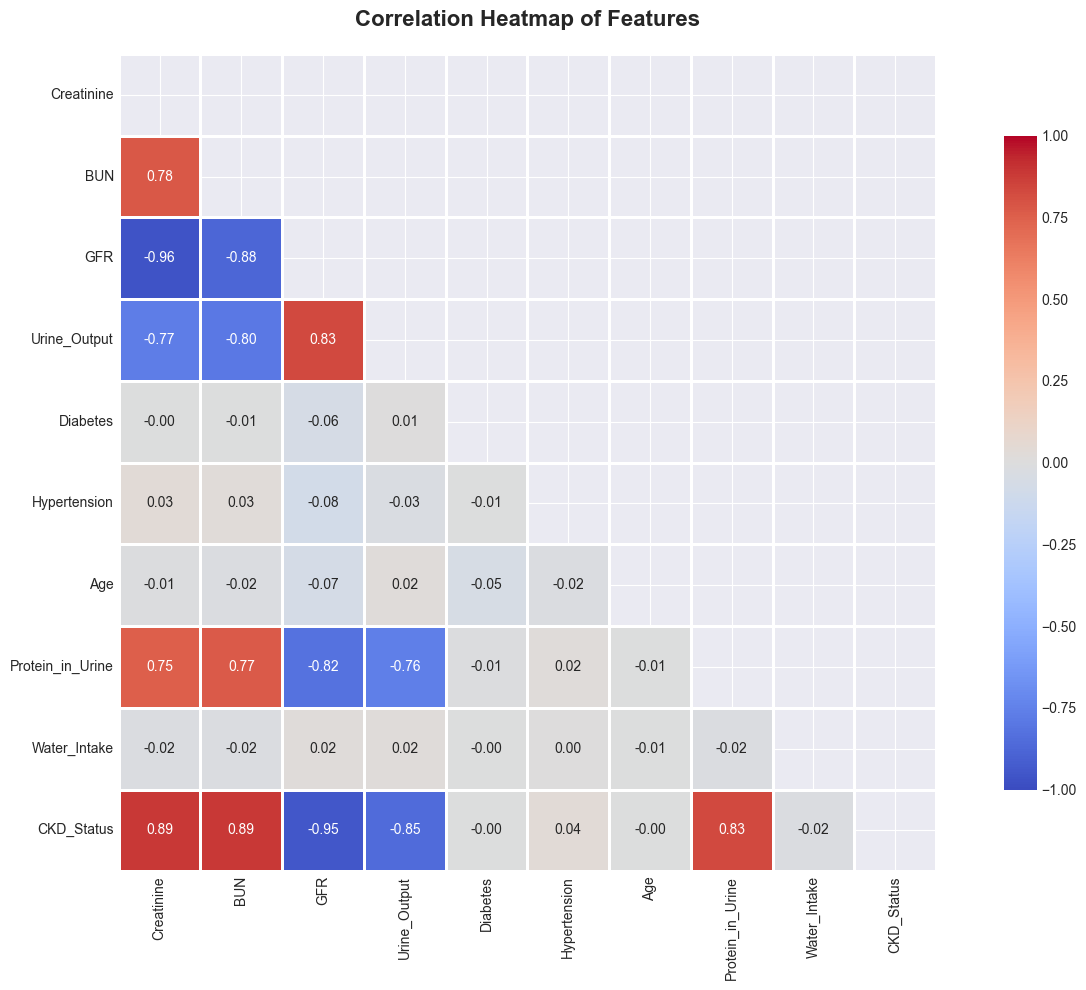

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            vmin=-1, vmax=1, annot_kws={'size': 10})
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


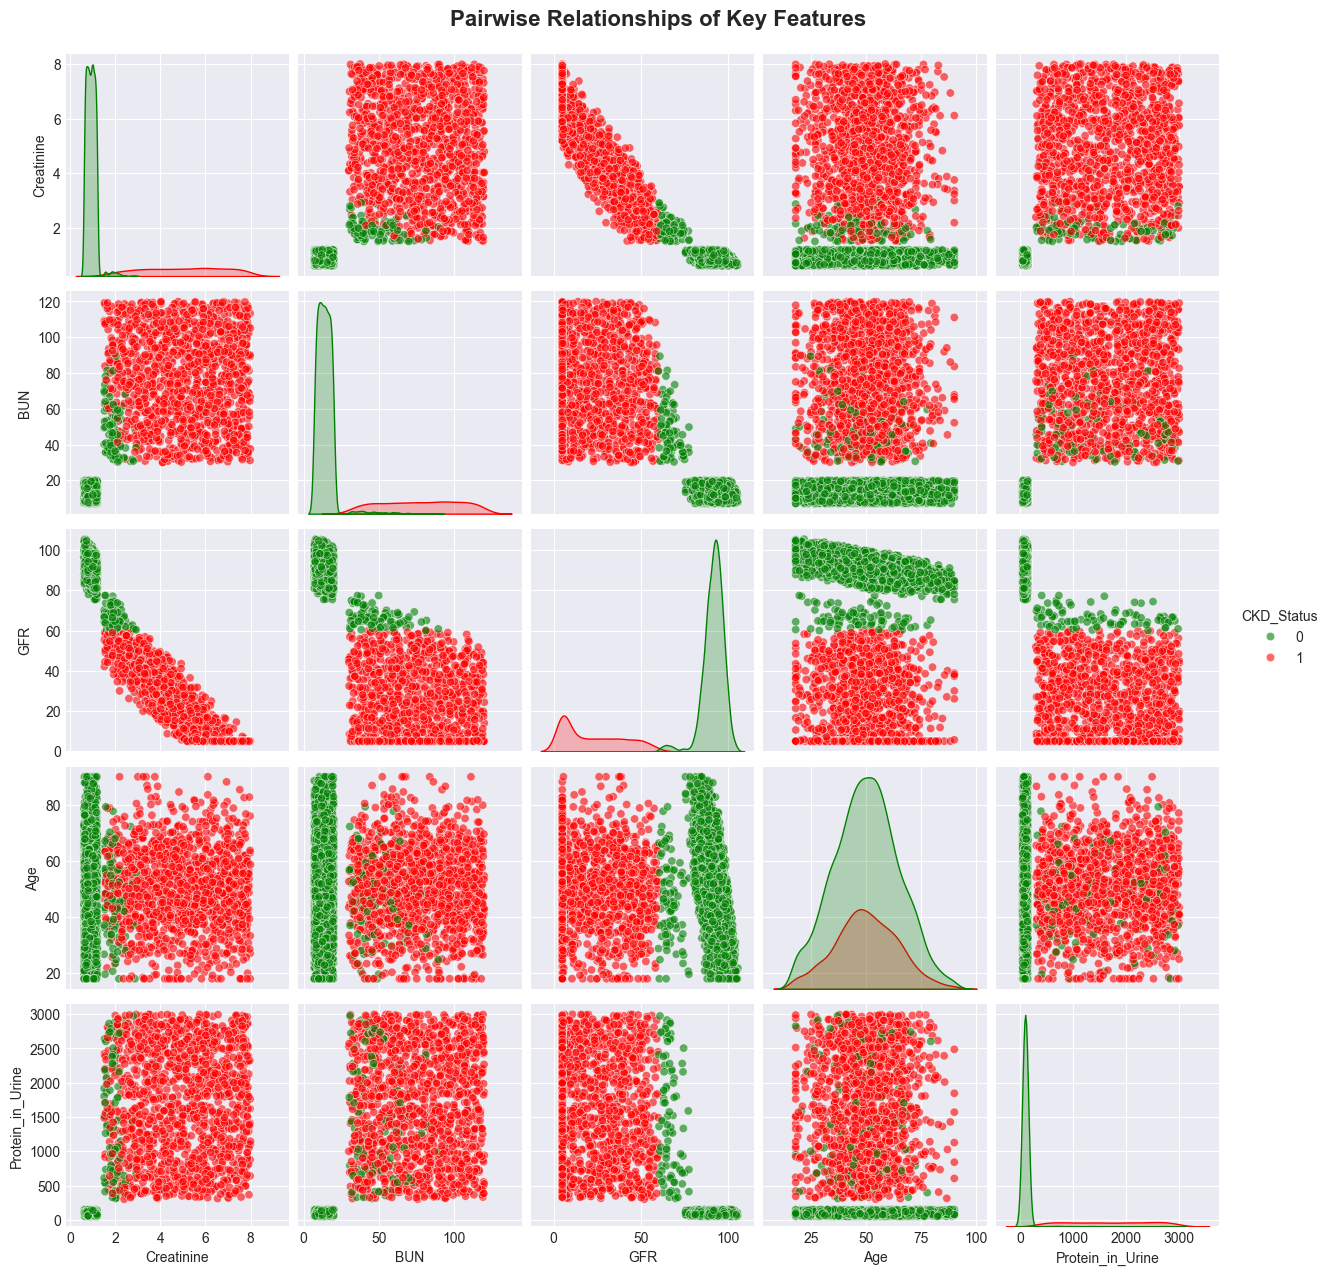

In [ ]:
# Pairplot for key features
key_features = ['Creatinine', 'BUN', 'GFR', 'Age', 'Protein_in_Urine', 'CKD_Status']
sns.pairplot(df[key_features], hue='CKD_Status', diag_kind='kde', 
             palette=['green', 'red'], plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairwise Relationships of Key Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()


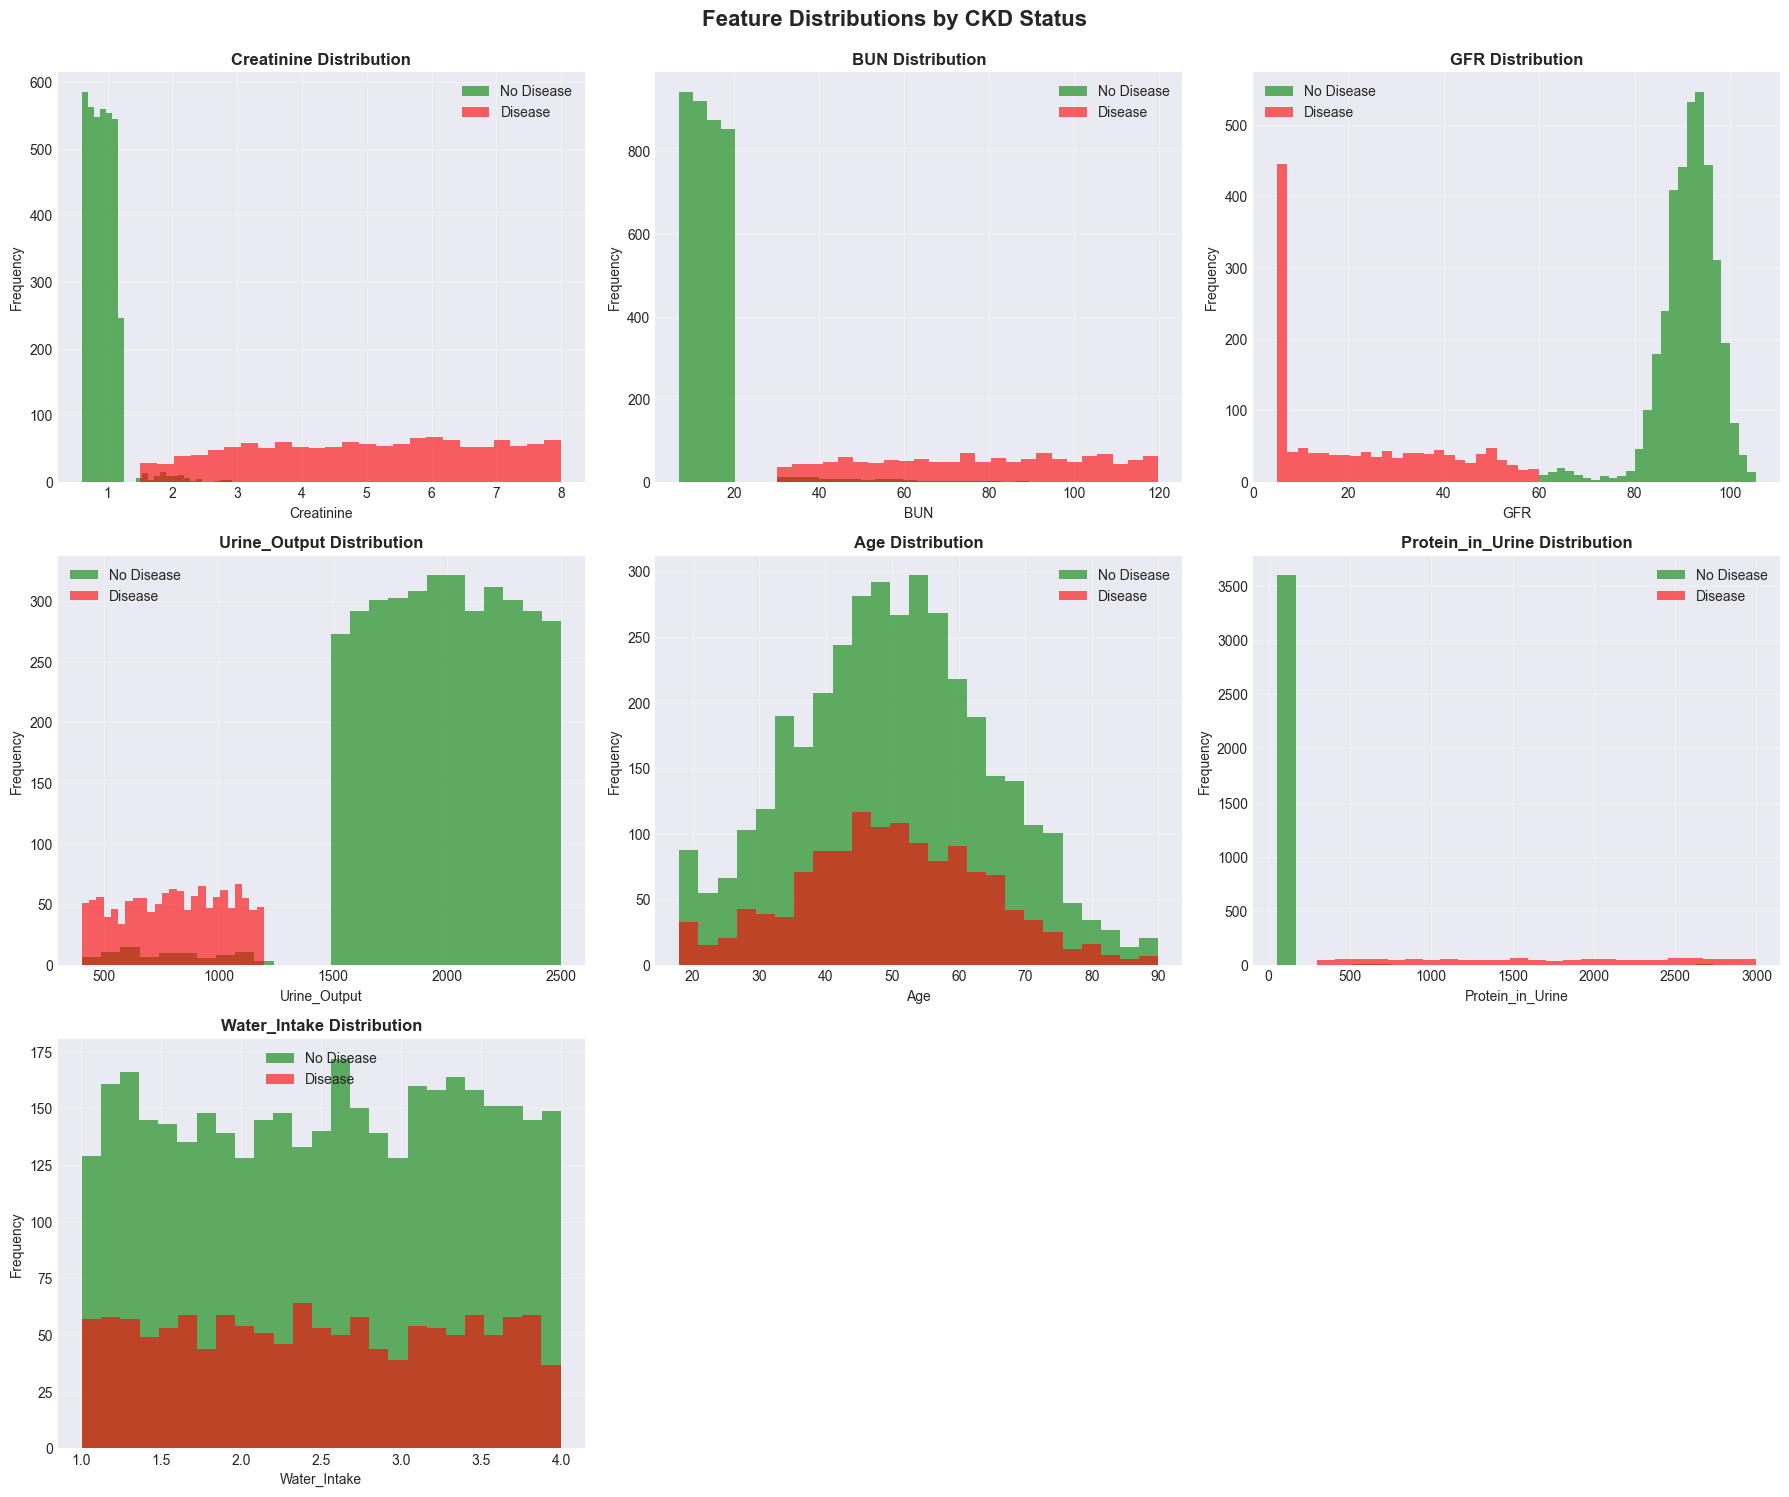

In [ ]:
# Feature distributions by CKD Status
numeric_features = ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Age', 
                   'Protein_in_Urine', 'Water_Intake']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    df[df['CKD_Status']==0][feature].hist(alpha=0.6, label='No Disease', bins=25, 
                                           color='green', ax=ax)
    df[df['CKD_Status']==1][feature].hist(alpha=0.6, label='Disease', bins=25, 
                                           color='red', ax=ax)
    ax.set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(alpha=0.3)

# Remove empty subplot
axes[7].remove()
axes[8].remove()

plt.suptitle('Feature Distributions by CKD Status', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


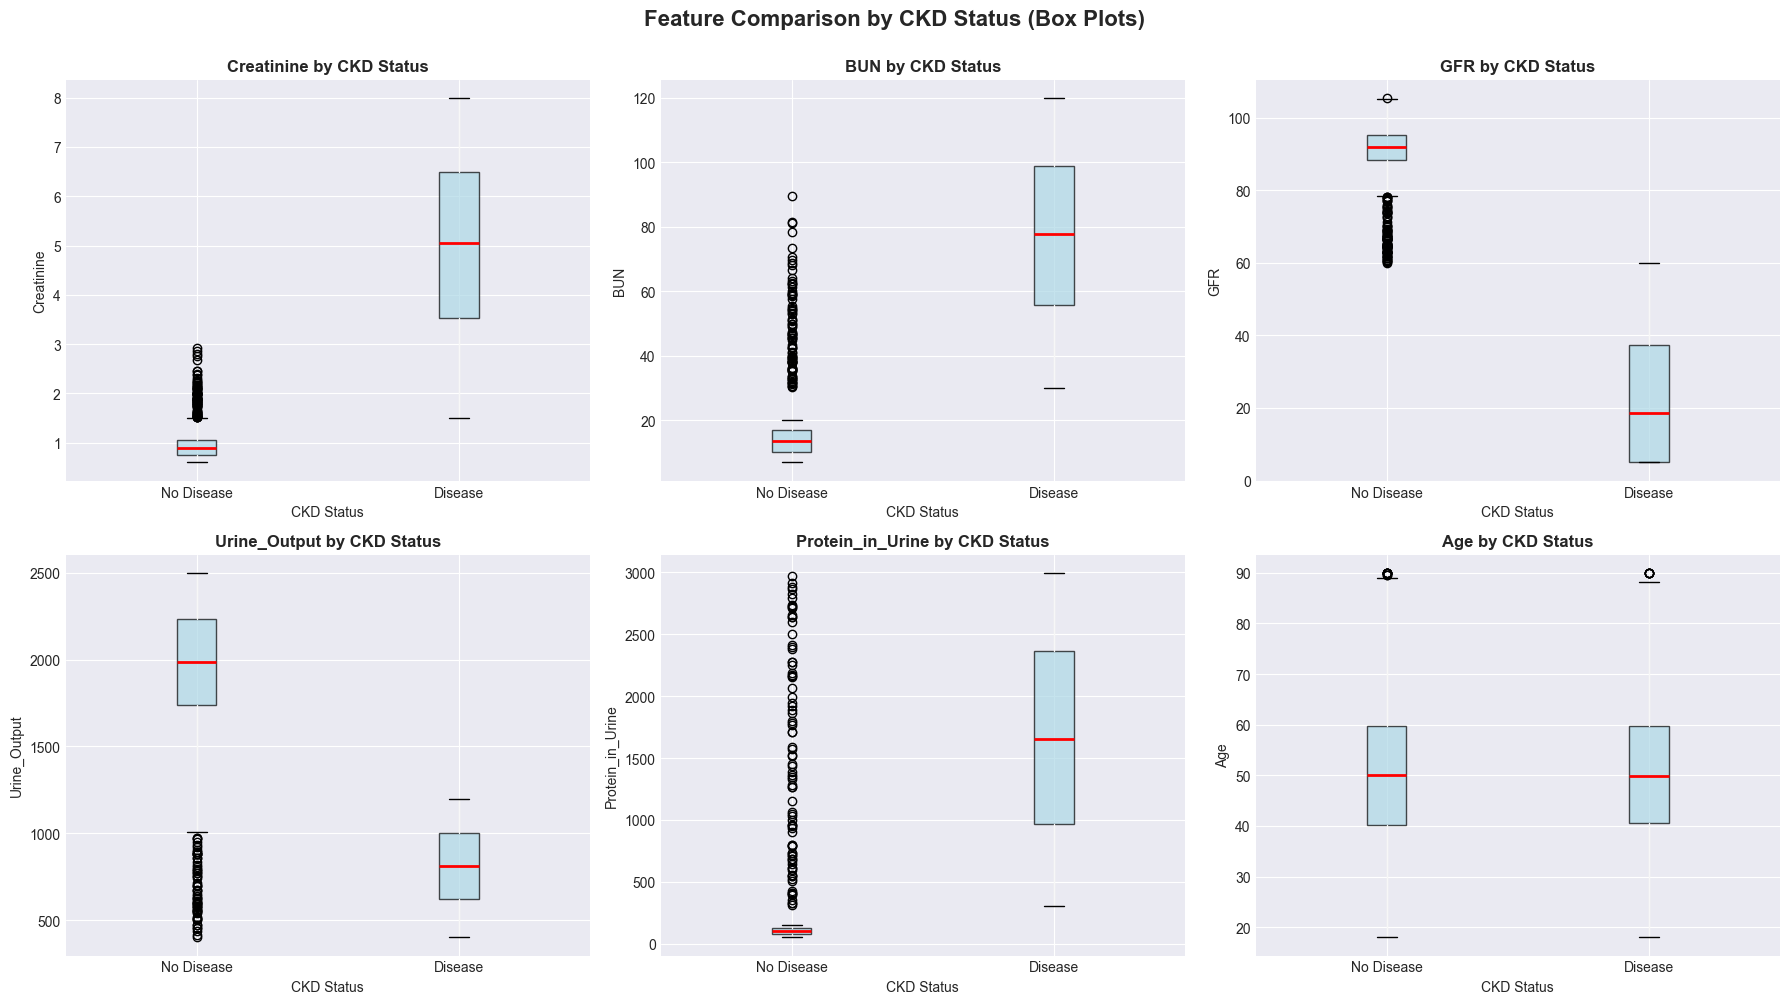

In [ ]:
# Box plots for key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

key_features_box = ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Protein_in_Urine', 'Age']

for idx, feature in enumerate(key_features_box):
    ax = axes[idx]
    df.boxplot(column=feature, by='CKD_Status', ax=ax, patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'{feature} by CKD Status', fontsize=12, fontweight='bold')
    ax.set_xlabel('CKD Status', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.set_xticklabels(['No Disease', 'Disease'])
    plt.suptitle('')

plt.suptitle('Feature Comparison by CKD Status (Box Plots)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()


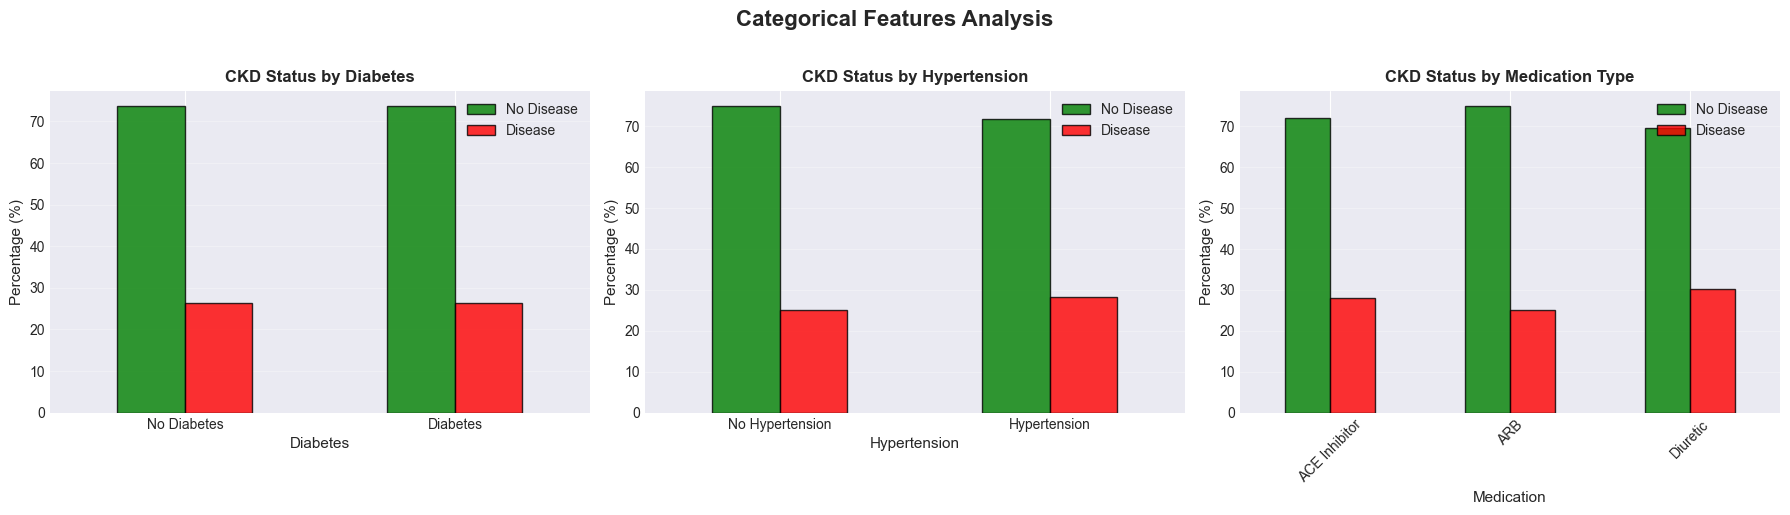

In [ ]:
# Categorical features analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Diabetes vs CKD Status
crosstab_diabetes = pd.crosstab(df['Diabetes'], df['CKD_Status'], normalize='index') * 100
crosstab_diabetes.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.8, edgecolor='black')
axes[0].set_title('CKD Status by Diabetes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Diabetes', fontsize=11)
axes[0].set_ylabel('Percentage (%)', fontsize=11)
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
axes[0].legend(['No Disease', 'Disease'])
axes[0].grid(axis='y', alpha=0.3)

# Hypertension vs CKD Status
crosstab_hypertension = pd.crosstab(df['Hypertension'], df['CKD_Status'], normalize='index') * 100
crosstab_hypertension.plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.8, edgecolor='black')
axes[1].set_title('CKD Status by Hypertension', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Hypertension', fontsize=11)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].set_xticklabels(['No Hypertension', 'Hypertension'], rotation=0)
axes[1].legend(['No Disease', 'Disease'])
axes[1].grid(axis='y', alpha=0.3)

# Medication vs CKD Status
crosstab_medication = pd.crosstab(df['Medication'], df['CKD_Status'], normalize='index') * 100
crosstab_medication.plot(kind='bar', ax=axes[2], color=['green', 'red'], alpha=0.8, edgecolor='black')
axes[2].set_title('CKD Status by Medication Type', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Medication', fontsize=11)
axes[2].set_ylabel('Percentage (%)', fontsize=11)
axes[2].legend(['No Disease', 'Disease'])
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Categorical Features Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 3. Data Preprocessing


In [ ]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Handle 'None' values in Medication column (replace with 'No Medication')
df_processed['Medication'] = df_processed['Medication'].replace('None', 'No Medication')

# Encode categorical variables
le_medication = LabelEncoder()
df_processed['Medication_encoded'] = le_medication.fit_transform(df_processed['Medication'])

# Prepare features and target
X = df_processed.drop(['CKD_Status', 'Medication'], axis=1)
y = df_processed['CKD_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 60)
print("DATA PREPROCESSING COMPLETE")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTest set target distribution:")
print(y_test.value_counts())


DATA PREPROCESSING COMPLETE
Training set size: 4000
Test set size: 1000
Number of features: 10

Training set target distribution:
CKD_Status
0    2948
1    1052
Name: count, dtype: int64

Test set target distribution:
CKD_Status
0    737
1    263
Name: count, dtype: int64


## 4. Machine Learning Models Implementation


In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
}

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Train and evaluate models
print("=" * 60)
print("TRAINING AND EVALUATING MODELS")
print("=" * 60)

for name, model in models.items():
    # Choose scaled or unscaled data based on model
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)
    
    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df


TRAINING AND EVALUATING MODELS

Logistic Regression:
  Accuracy:  0.9960
  Precision: 0.9850
  Recall:    1.0000
  F1-Score:  0.9925
  ROC-AUC:   1.0000

Random Forest:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000

SVM:
  Accuracy:  0.9950
  Precision: 0.9813
  Recall:    1.0000
  F1-Score:  0.9906
  ROC-AUC:   0.9999

K-Nearest Neighbors:
  Accuracy:  0.9860
  Precision: 0.9560
  Recall:    0.9924
  F1-Score:  0.9739
  ROC-AUC:   0.9987

Naive Bayes:
  Accuracy:  0.9810
  Precision: 0.9326
  Recall:    1.0000
  F1-Score:  0.9651
  ROC-AUC:   0.9905

Gradient Boosting:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000

Decision Tree:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.996,0.985019,1.000000,0.992453,0.999995
1,Random Forest,1.000,1.000000,1.000000,1.000000,1.000000
2,SVM,0.995,0.981343,1.000000,0.990584,0.999902
3,K-Nearest Neighbors,0.986,0.956044,0.992395,0.973881,0.998718
4,Naive Bayes,0.981,0.932624,1.000000,0.965138,0.990502
5,Gradient Boosting,1.000,1.000000,1.000000,1.000000,1.000000
6,Decision Tree,1.000,1.000000,1.000000,1.000000,1.000000


## 5. Model Performance Visualization


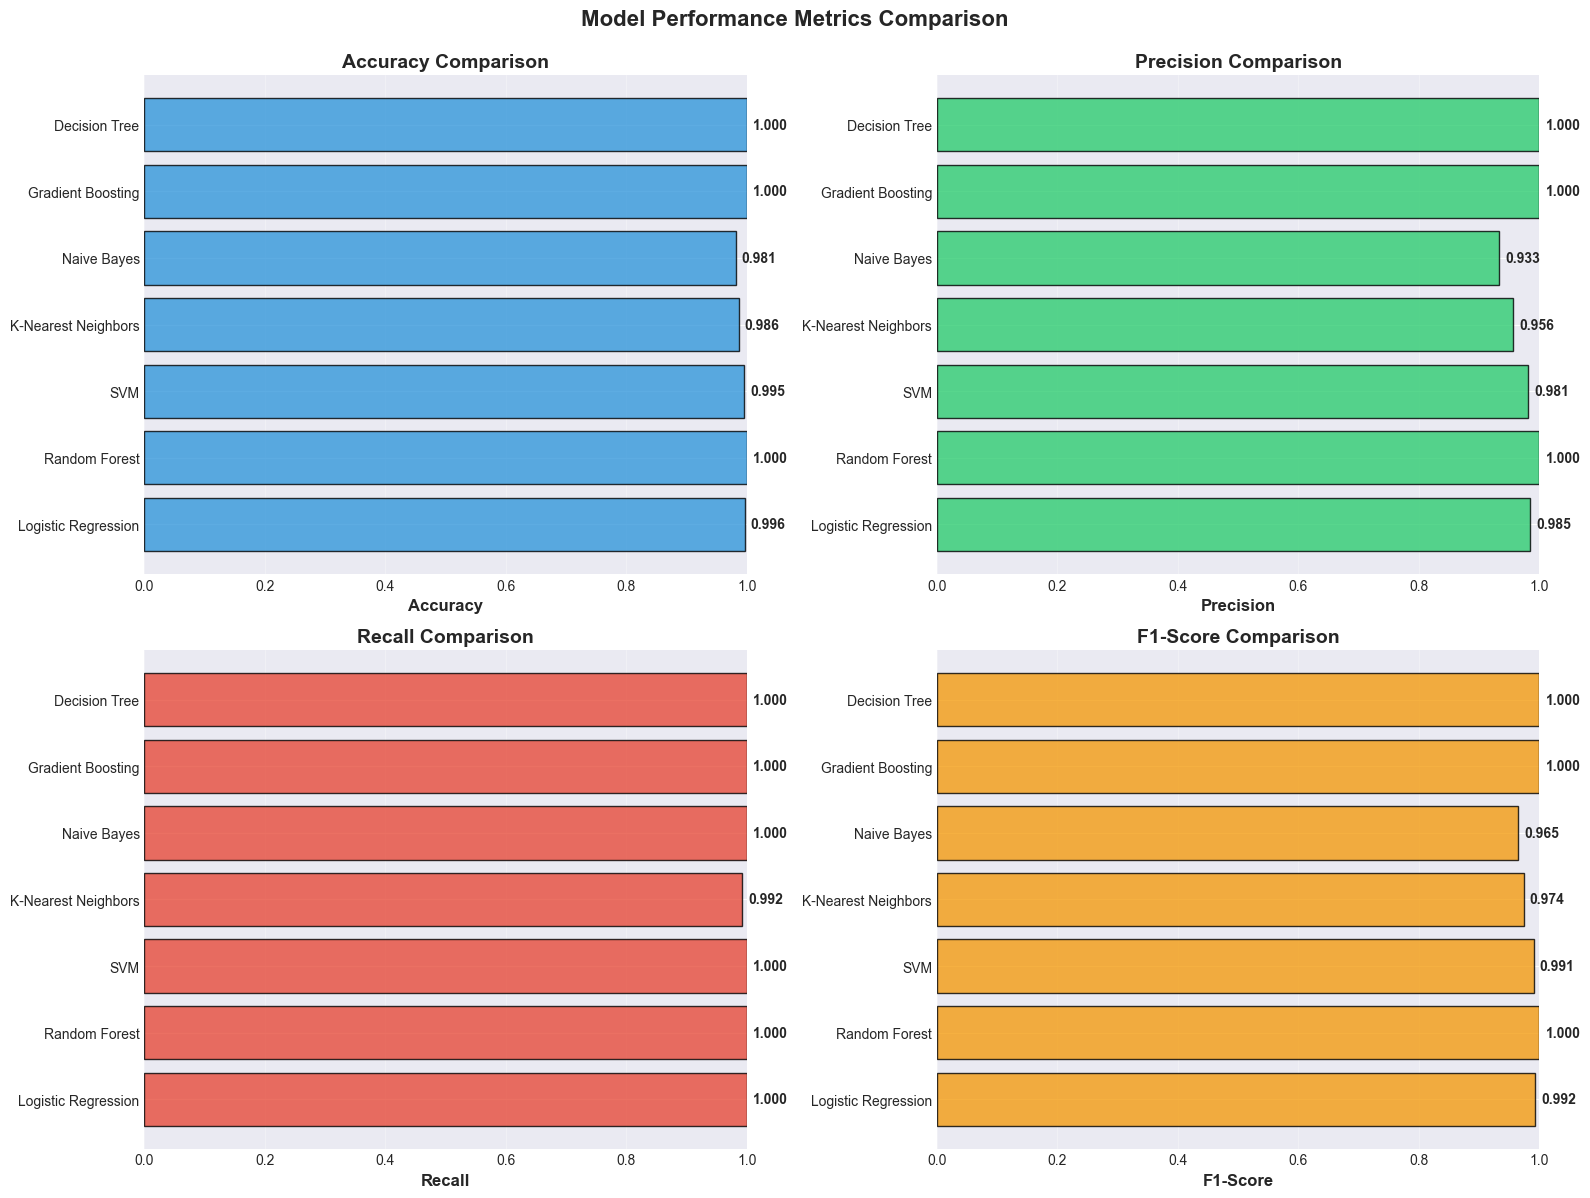

In [ ]:
# Performance metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_list = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(results_df['Model'], results_df[metric], color=colors_list[idx], alpha=0.8, edgecolor='black')
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
               f'{width:.3f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.suptitle('Model Performance Metrics Comparison', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


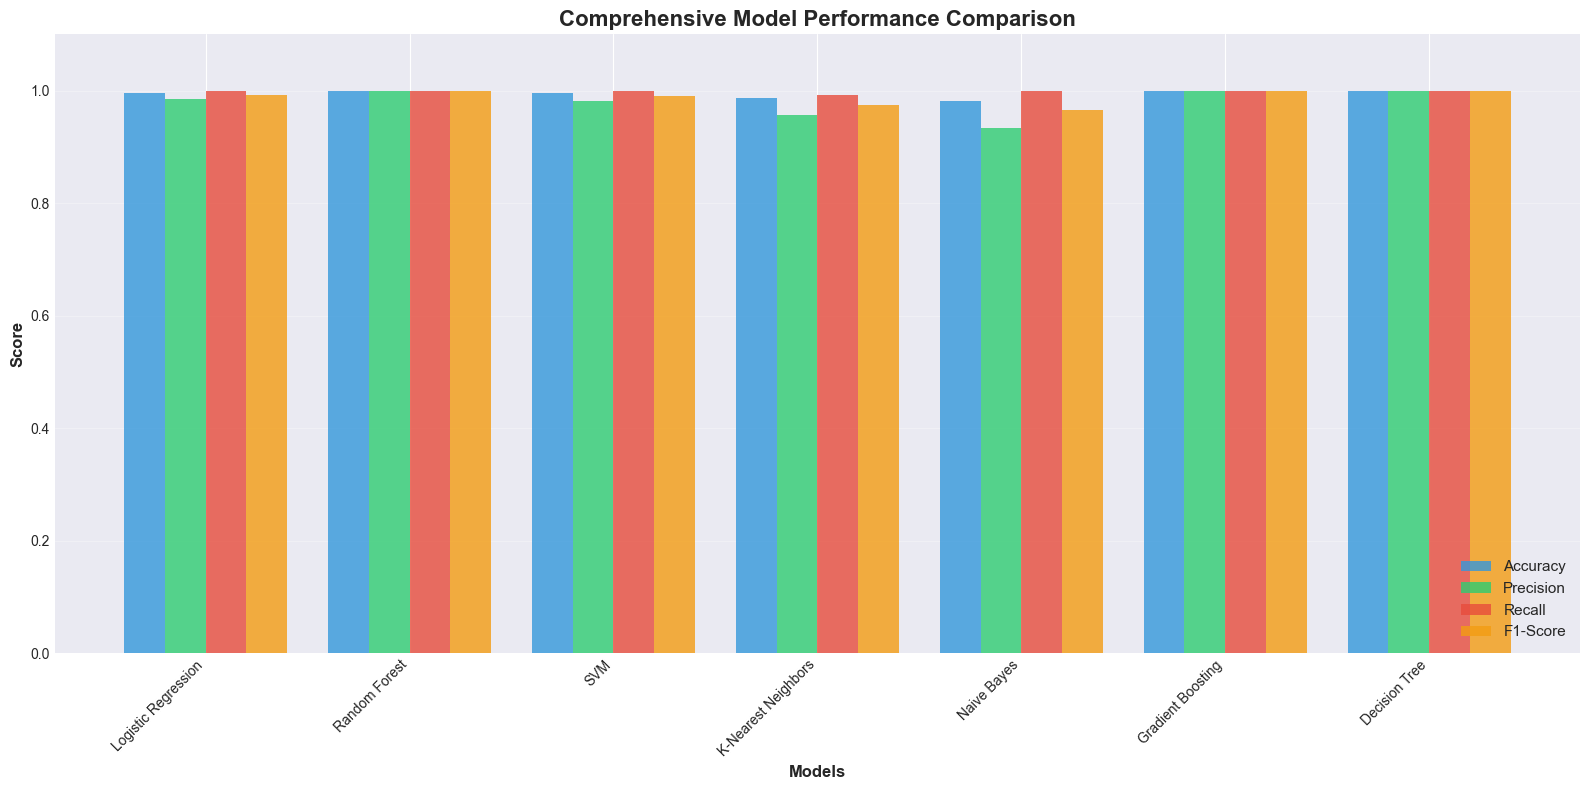

In [ ]:
# Comprehensive metrics comparison - grouped bar chart
x = np.arange(len(results_df['Model']))
width = 0.2

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', alpha=0.8, color='#3498db')
ax.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', alpha=0.8, color='#2ecc71')
ax.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', alpha=0.8, color='#e74c3c')
ax.bar(x + 1.5*width, results_df['F1-Score'], width, label='F1-Score', alpha=0.8, color='#f39c12')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()


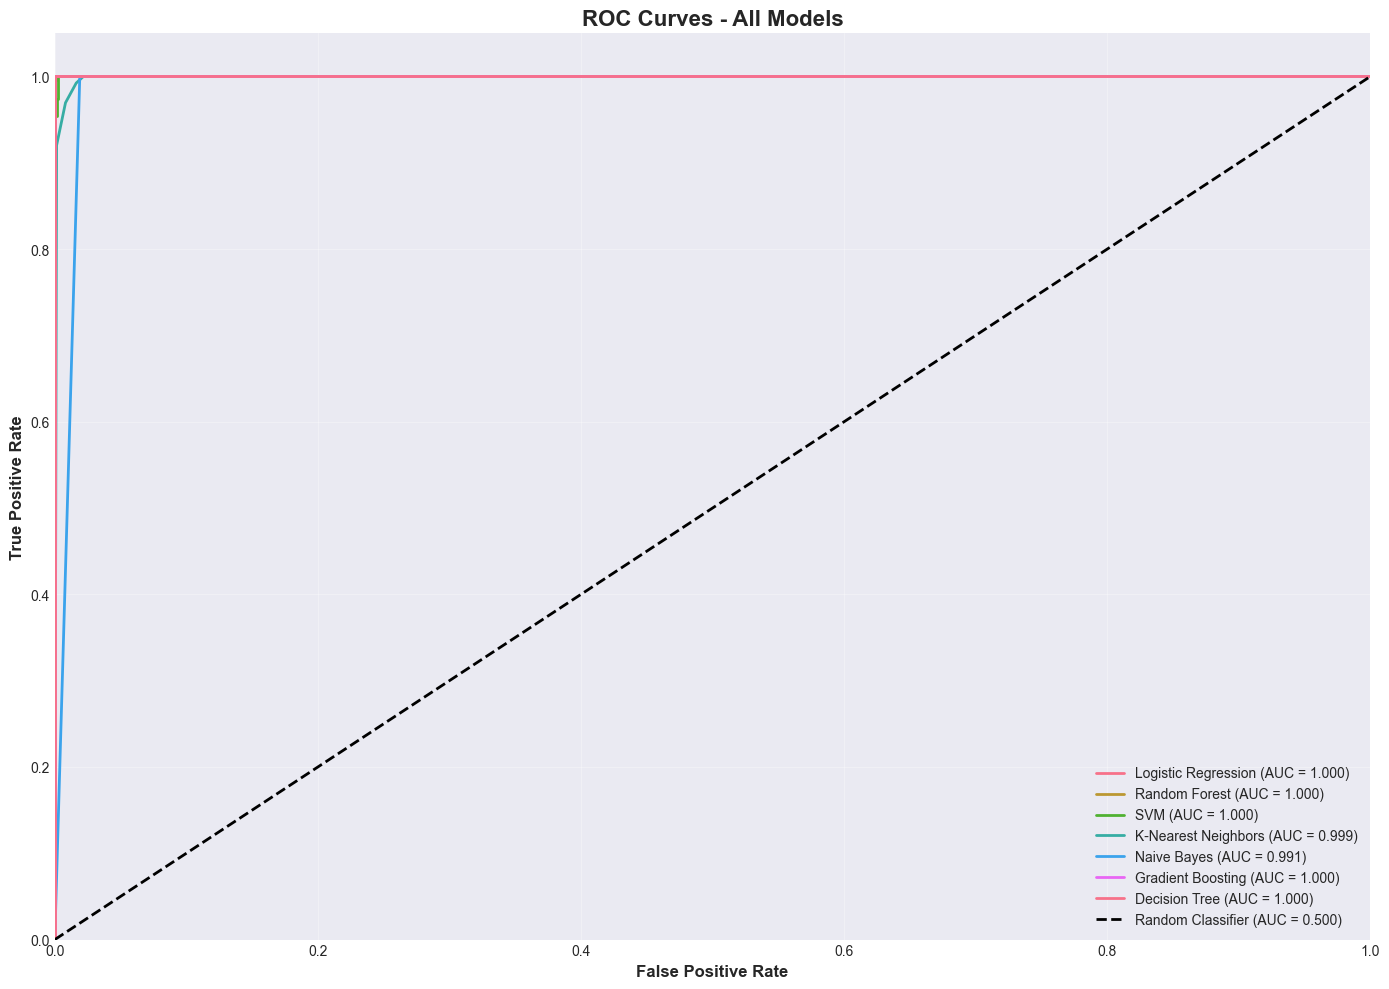

In [ ]:
# ROC Curves for all models
plt.figure(figsize=(14, 10))

for name, model in models.items():
    # Choose scaled or unscaled data based on model
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


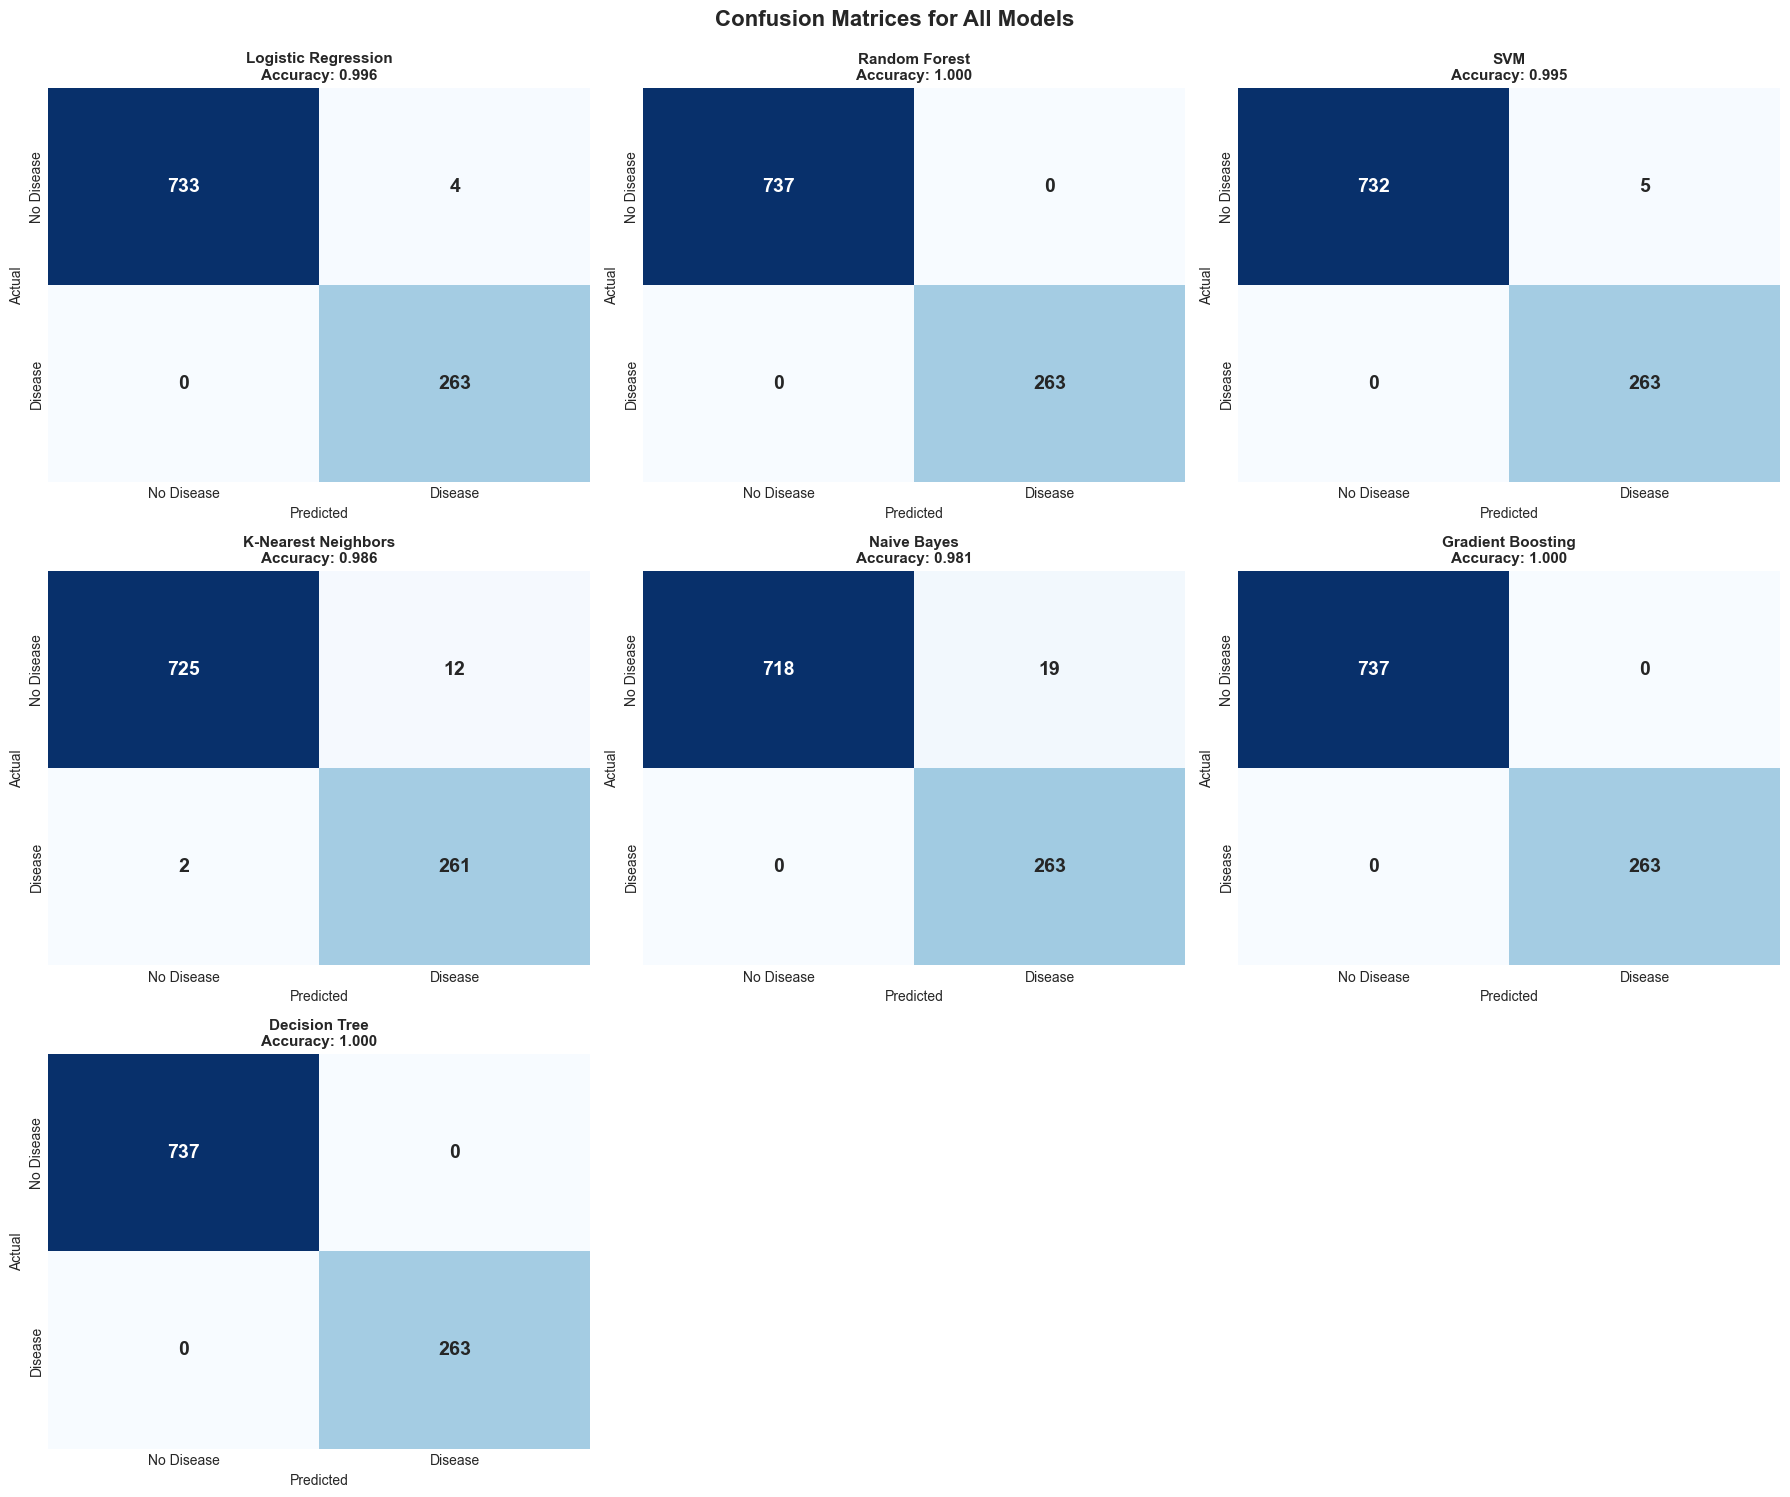

In [ ]:
# Confusion Matrices for all models
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

model_names = list(models.keys())
for idx, (name, model) in enumerate(models.items()):
    if idx < 7:  # We have 7 models
        ax = axes[idx]
        # Choose scaled or unscaled data based on model
        if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
            y_pred = model.predict(X_test_scaled)
        else:
            y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                   annot_kws={'size': 14, 'weight': 'bold'})
        ax.set_title(f'{name}\nAccuracy: {accuracy_score(y_test, y_pred):.3f}', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Predicted', fontsize=10)
        ax.set_ylabel('Actual', fontsize=10)
        ax.set_xticklabels(['No Disease', 'Disease'])
        ax.set_yticklabels(['No Disease', 'Disease'])

# Remove empty subplots
axes[7].remove()
axes[8].remove()

plt.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


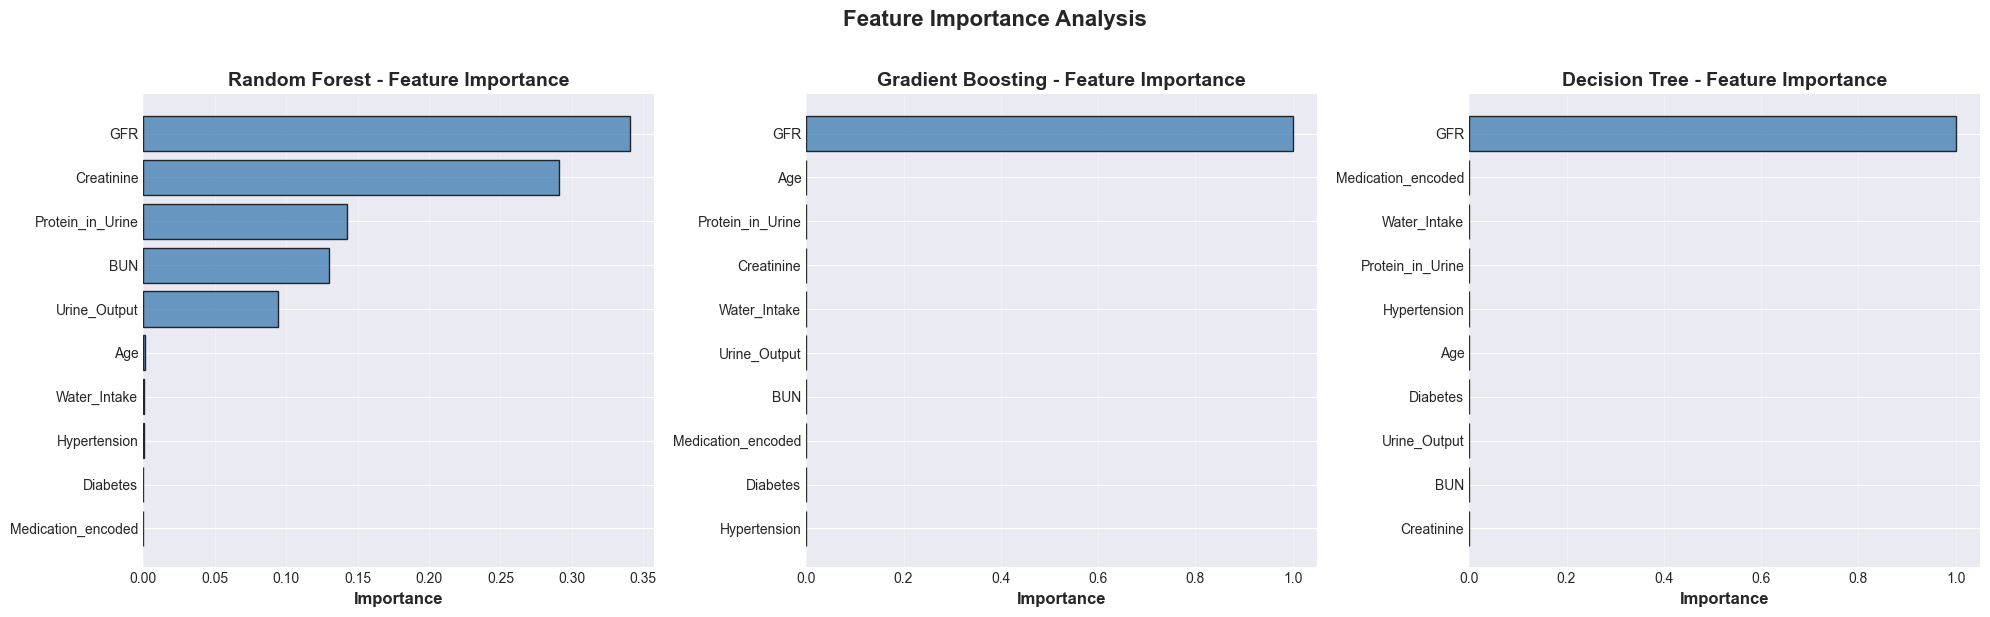

In [ ]:
# Feature Importance for tree-based models
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

tree_models = {
    'Random Forest': models['Random Forest'],
    'Gradient Boosting': models['Gradient Boosting'],
    'Decision Tree': models['Decision Tree']
}

for idx, (name, model) in enumerate(tree_models.items()):
    ax = axes[idx]
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    ax.barh(feature_importance['feature'], feature_importance['importance'], 
           color='steelblue', alpha=0.8, edgecolor='black')
    ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
    ax.set_title(f'{name} - Feature Importance', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 6. Cross-Validation Analysis


CROSS-VALIDATION ANALYSIS (5-Fold)
Logistic Regression      : 0.9990 (+/- 0.0010)
Random Forest            : 0.9998 (+/- 0.0010)
SVM                      : 0.9953 (+/- 0.0029)
K-Nearest Neighbors      : 0.9895 (+/- 0.0049)
Naive Bayes              : 0.9827 (+/- 0.0062)
Gradient Boosting        : 0.9998 (+/- 0.0010)
Decision Tree            : 0.9998 (+/- 0.0010)


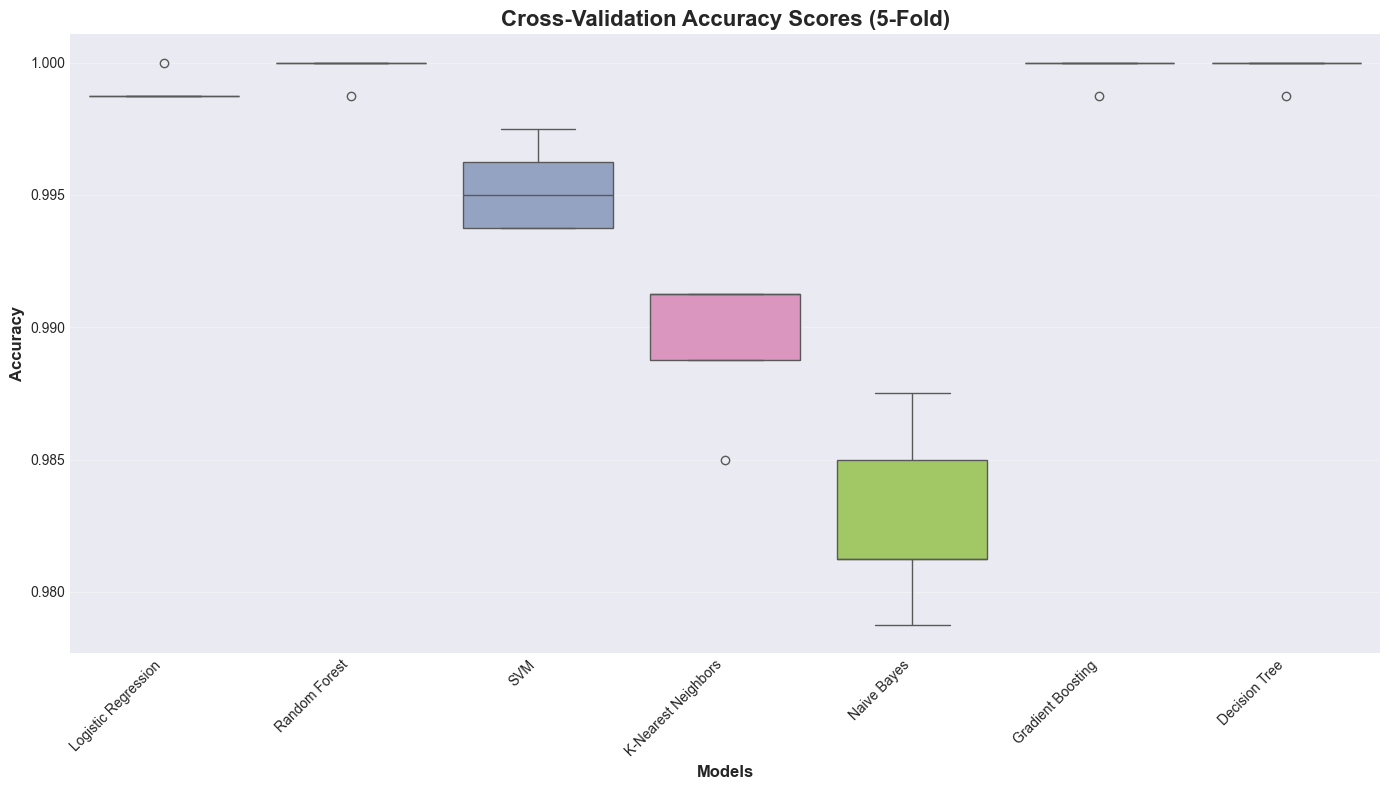

In [ ]:
# Cross-validation scores
cv_scores = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("=" * 60)
print("CROSS-VALIDATION ANALYSIS (5-Fold)")
print("=" * 60)

for name, model in models.items():
    # Choose scaled or unscaled data based on model
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    else:
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    
    cv_scores[name] = scores
    print(f"{name:25s}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Visualize cross-validation results
cv_df = pd.DataFrame(cv_scores)
cv_df = cv_df.melt(var_name='Model', value_name='Accuracy')

plt.figure(figsize=(14, 8))
sns.boxplot(data=cv_df, x='Model', y='Accuracy', palette='Set2')
plt.title('Cross-Validation Accuracy Scores (5-Fold)', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Model Comparison Summary


FINAL MODEL RANKING (by F1-Score)
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest     1.000   1.000000 1.000000  1.000000 1.000000
  Gradient Boosting     1.000   1.000000 1.000000  1.000000 1.000000
      Decision Tree     1.000   1.000000 1.000000  1.000000 1.000000
Logistic Regression     0.996   0.985019 1.000000  0.992453 0.999995
                SVM     0.995   0.981343 1.000000  0.990584 0.999902
K-Nearest Neighbors     0.986   0.956044 0.992395  0.973881 0.998718
        Naive Bayes     0.981   0.932624 1.000000  0.965138 0.990502


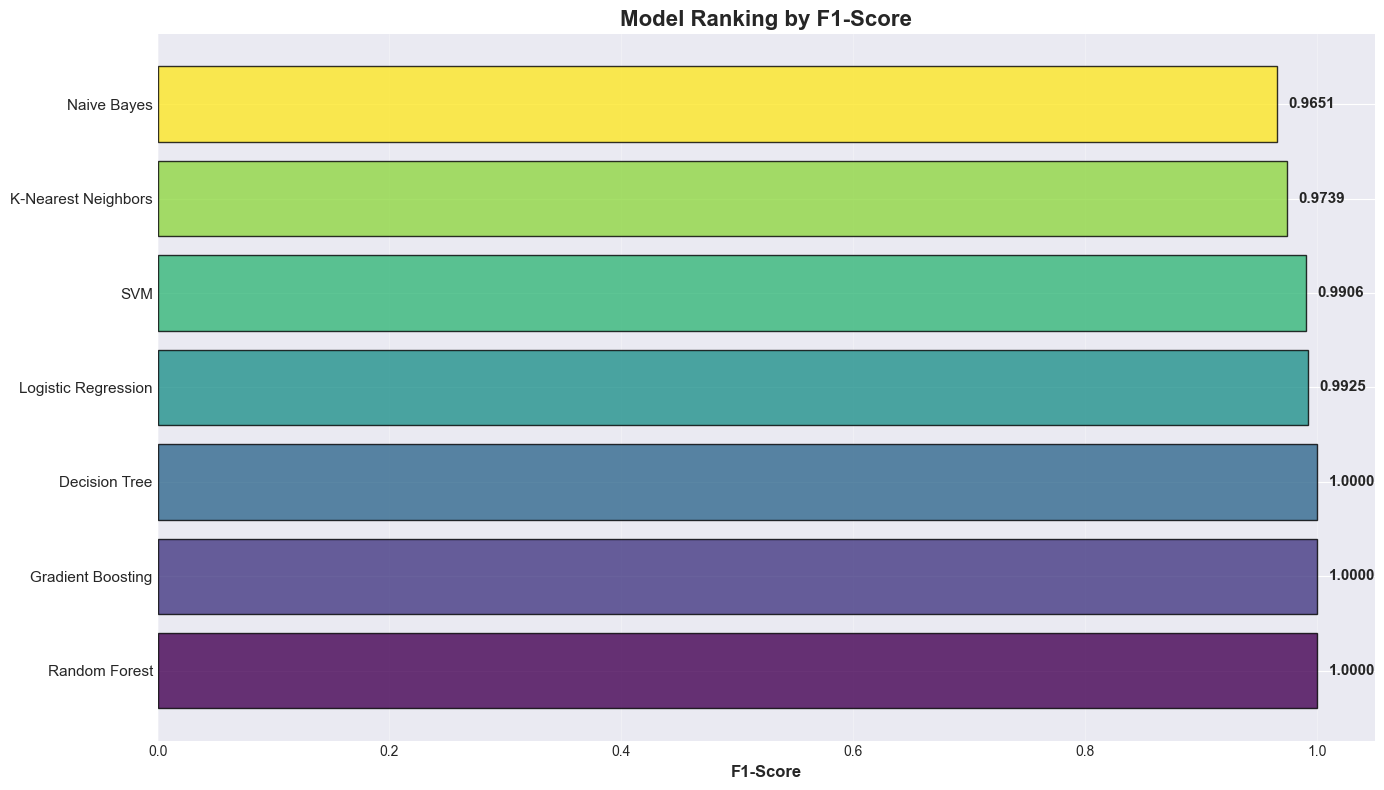

In [ ]:
# Sort models by F1-Score (best metric for imbalanced datasets)
results_df_sorted = results_df.sort_values('F1-Score', ascending=False)

print("=" * 60)
print("FINAL MODEL RANKING (by F1-Score)")
print("=" * 60)
print(results_df_sorted.to_string(index=False))

# Visualize ranking
fig, ax = plt.subplots(figsize=(14, 8))
y_pos = np.arange(len(results_df_sorted))
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df_sorted)))

bars = ax.barh(y_pos, results_df_sorted['F1-Score'], color=colors, alpha=0.8, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(results_df_sorted['Model'], fontsize=11)
ax.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Model Ranking by F1-Score', fontsize=16, fontweight='bold')
ax.set_xlim([0, 1.05])
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
           f'{width:.4f}', ha='left', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Detailed classification report for the best model
best_model_name = results_df_sorted.iloc[0]['Model']
best_model = models[best_model_name]

print("=" * 60)
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}")
print("=" * 60)

if best_model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best, target_names=['No Disease', 'Disease']))


DETAILED CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       737
     Disease       1.00      1.00      1.00       263

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



## 8. Conclusion

This notebook implemented and compared 7 different machine learning algorithms for kidney disease classification:

1. **Logistic Regression** - Linear classifier
2. **Random Forest** - Ensemble of decision trees
3. **SVM** - Support Vector Machine
4. **K-Nearest Neighbors** - Instance-based learning
5. **Naive Bayes** - Probabilistic classifier
6. **Gradient Boosting** - Sequential ensemble method
7. **Decision Tree** - Simple tree-based classifier

The models were evaluated using multiple metrics including Accuracy, Precision, Recall, F1-Score, and ROC-AUC. The best performing model can be identified from the ranking above.

### Key Insights:
- The dataset shows clear patterns in features like Creatinine, GFR, and Protein_in_Urine for disease classification
- Different algorithms have varying strengths and weaknesses
- Tree-based models provide feature importance insights
- Cross-validation helps ensure model robustness
